Methods and functions for stock selection: Fundamental data analisys

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import quantstats as qs

In [23]:
ticker = 'WSC'
dict = yf.Ticker(ticker).info
dict['longName'], dict['sector'], dict['industry'], dict['forwardPE'], dict['marketCap']

('WillScot Mobile Mini Holdings Corp.',
 'Industrials',
 'Rental & Leasing Services',
 25.936937,
 6515062272)

In [24]:
yf.Ticker(ticker).info

{'zip': '85008',
 'sector': 'Industrials',
 'fullTimeEmployees': 4300,
 'longBusinessSummary': 'WillScot Mobile Mini Holdings Corp. provides modular space and portable storage solutions in the United States, Canada, Mexico, and the United Kingdom. The company leases various office space and storage solutions for temporary applications across a customer base in the commercial and industrial, construction, retail, education, natural resources, health care, government, transportation, security, and energy sectors. It operates a fleet of over 350,000 portable offices and storage containers. WillScot Mobile Mini Holdings Corp. is headquartered in Phoenix, Arizona.',
 'city': 'Phoenix',
 'phone': '480 894 6311',
 'state': 'AZ',
 'country': 'United States',
 'companyOfficers': [],
 'website': 'http://www.willscotmobilemini.com',
 'maxAge': 1,
 'address1': '4646 East Van Buren Street',
 'industry': 'Rental & Leasing Services',
 'address2': 'Suite 400',
 'previousClose': 28.53,
 'regularMarketO

In [17]:
dict['forwardPE']

In [18]:
dict['longName'], dict['sector'], dict['industry']

KeyError: 'sector'

In [79]:
x = [12, 14, 15, 13, 19, 23, 34, 35, 56, 54, 43, 41, 34, 46]

In [80]:
y = [2*x**0.5/np.pi**0.5 for x in x]
y

[3.9088200952233594,
 4.222008245644752,
 4.370193722368317,
 4.068428945128219,
 4.918490759365936,
 5.4115163798060095,
 6.579524642479542,
 6.675581178124546,
 8.444016491289505,
 8.291859587312052,
 7.399277020331919,
 7.225151993843567,
 6.579524642479542,
 7.653039857325813]

In [71]:
z = np.diff(x)
z

array([11, 11,  1, 21, -2])

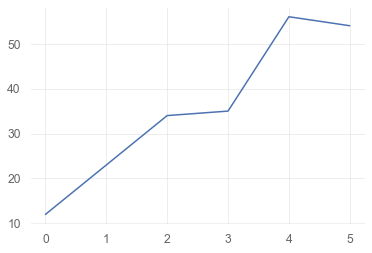

In [73]:
plt.plot(x)

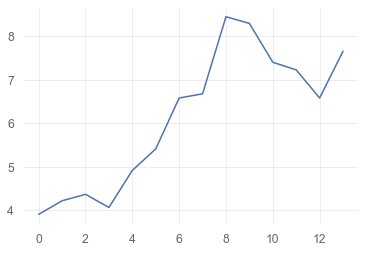

In [83]:
plt.plot(y)

In [81]:
t = np.diff(y)
t

array([ 0.31318815,  0.14818548, -0.30176478,  0.85006181,  0.49302562,
        1.16800826,  0.09605654,  1.76843531, -0.1521569 , -0.89258257,
       -0.17412503, -0.64562735,  1.07351521])

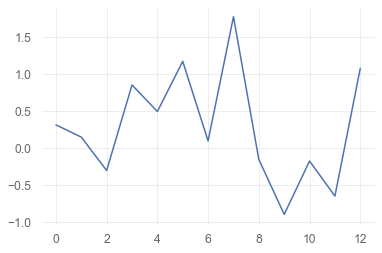

In [82]:
plt.plot(t)

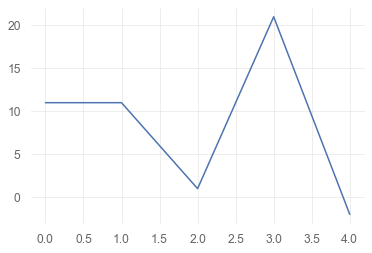

In [78]:
plt.plot(z)

In [57]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [58]:
import sympy

In [61]:
x, y = sympy.symbols('x y')

In [64]:
(x**x)**3

x**(3*x)

In [51]:
y = [1/(np.pi*x)**0.5 for x in x]
y

[0.16286750396763996,
 0.11764166043056543,
 0.09675771533058149,
 0.09536544540177921,
 0.07539300438651343,
 0.03720155946846915]

In [55]:
y = [np.log(x) for x in x]

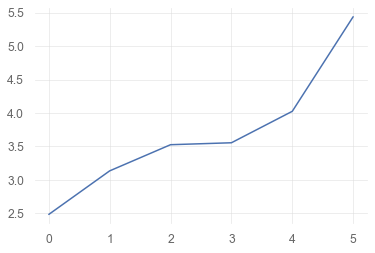

In [56]:
plt.plot(y)
plt.show()

In [ ]:
PERIOD_ATR = 14
PERIOD_Z = 30

PLOT = True

for ticker in tickers:
    try:
        data = web.get_data_yahoo(ticker, start, end)
        data = data.reset_index()
        
        data['Quintile'] = pd.qcut(data['Close'], 5, labels=False)
        ATR(data, PERIOD_ATR)
        data['Z'] = (data['ATR'] - data['ATR'].rolling(PERIOD_Z).mean()) / data['ATR'].rolling(PERIOD_Z).std()
        data['Logreturn'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
        data = data.dropna()
        #data = data.reset_index()
        
        if PLOT:
       
            plt.figure(figsize=(15,10))

            plt.subplot(3,1,1)
            plt.plot(data['Adj Close'])
            plt.title(ticker)
            plt.grid(True)
        
            plt.subplot(3,1,2)
            plt.plot(data['Quintile'], c='g')
            plt.grid(True)
        
            plt.subplot(3,1,3)
            plt.plot(data['Z'], c='r')
            plt.hlines(2, min(data.index), max(data.index), linestyles='dashdot')
            plt.hlines(-2, min(data.index),  max(data.index), linestyles='dashdot')
            plt.title(f'Z-score({PERIOD_Z}) from ATR({PERIOD_ATR})')
            plt.grid(True)

            plt.show()
        
        
    except:
        print(f'Cannot calculate for {ticker}!')